In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cdms2
import cdutil
from scipy.interpolate import interp1d

from mpl_toolkits.basemap import Basemap
#from netCDF4 import Dataset, date2index
from datetime import datetime

import os
import copy
import glob
import cartopy.crs as ccrs
from netCDF4 import Dataset as netcdf_dataset
import numpy.ma as ma
from matplotlib import ticker as tk

#function version
#import lineplotsfuncs as lps

In [45]:
from netCDF4 import MFDataset
dir = '/Users/d3x345/NetCDF_Files/'
ffam = dir+"vd05*ANN*00*nc" # the file family
print ffam
import glob
fnames = glob.glob(ffam)
print fnames
f = MFDataset(ffam)
# print f
var = f.variables["PRECC"]
print "var info", type(var), var.units
#varlatlon = var[0,:,:]
var2 = f.variables["PRECC"][0,:,:]
print "var2 info", type(var2), var2.units
#print "varlatlon info ", type(varlatlon)
#varlatlon.shape
#print f.variables["x"][:]

 /Users/d3x345/NetCDF_Files/vd05*ANN*00*nc
['/Users/d3x345/NetCDF_Files/vd05_ANN_000012_000511_climo.nc']
var info <class 'netCDF4._netCDF4._Variable'> m/s
var2 info <type 'numpy.ndarray'>

AttributeError: 'numpy.ndarray' object has no attribute 'units'

In [16]:
#import nc info
#series are applicable to both Ob and Amur

varname1 = 'PRECL' #arbitrary as long as present in files
varname2 = 'PRECC'
timeseries = ['01','02','03','04','05','06','07','08','09','10','11','12'] #ie, monthly
#timeseries = ["ANN","DJF"]

#fhomeRef = '/global/cscratch1/sd/beharrop/ACME/reg_climo/20161118.beta0.F1850COSP.ne30_ne30.edison/yrs00002_0011/'

fhomes = ['/global/cscratch1/sd/beharrop/ACME/climo/e_amip_vaer/yrs1980_2000/',
          '/global/cscratch1/sd/beharrop/ACME/reg_climo/20161118.beta0.F20TRCOSP.ne30_ne30.edison/yrs1980_2000',
          '/scratch1/scratchdirs/leebrent/lrhr/hr',"OBS"] #cam5, lores, hires, obs
fnames = ['CAM5 AMIP','EAMv1 AMIP','EAMv1HiRes AMIP','GPCPv2.2 OBS']
landfrac = list()
varSerList = list()
for i in range(len(fhomes)):
    fhome = fhomes[i]
    if fhome=='OBS':
        #how to deal w landfrac in obs?  not relevant for ob/amur river valleys
        fhomeObs = '/project/projectdirs/acme/obs_for_diagnostics/'
        ftypeObs='GPCP_v2.2'
        #fhomeOBS='/scratch1/scratchdirs/leebrent/tempobs/eagle1.umd.edu/GPCP_CDR/Monthly_Data/climos/'
        varname = 'PRECT'
        varSerObs = lps.varSeries(fhomeObs,varname,ftype=ftypeObs,conv=1)
        varSerList.append(varSerObs)
    else:
        temp = lps.varSeries(fhome,'LANDFRAC',conv=1)
        for j in range(len(temp)):
            temp[j] = (temp[j][:] > 0.5)*1.0 #convert to boolean, convert to 0/1 float (1= True, aka land)
        landfrac.append(temp[j])
        varSer1 = lps.varSeries(fhome,varname1)
        varSer2 = lps.varSeries(fhome,varname2)
        varSerTemp = [None]*len(timeseries) #convert precc + precl = prect
        for j in range(len(timeseries)):
            varSerTemp[j] = varSer1[j] + varSer2[j]
        varSerList.append(varSerTemp)
    del(fhome)


In [21]:
len(varSerList[1][1])

192

NameError: name 'varSerList' is not defined

<Figure size 432x288 with 0 Axes>

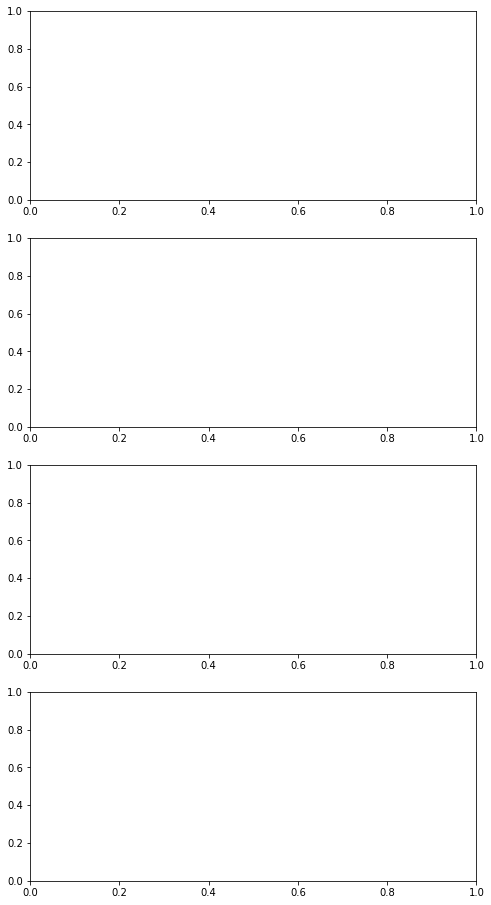

In [2]:
#verification plots -  (4)
latrange=(25.,49.)
lonrange=(-67.,-124.)

plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(8,16))

for i in range(len(varSerList)):
    var = varSerList[i][0]#take first variable
    loc = var.subRegion(latitude=latrange,longitude=lonrange)

    lats = loc.getLatitude()
    lons = loc.getLongitude()
    
    ax = plt.subplot('41'+str(i+1),projection=ccrs.PlateCarree()) #translate from zero-indexing

    cs = plt.contourf(lons,lats,loc, #norm=colors.LogNorm(),
                 transform=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    plt.title("CONUS Region: "+fnames[i]) #+ " (PRECT ANN)")
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=False)

#plt.savefig('CONUSregion_ANN.pdf',type='pdf')
plt.show()
plt.close()

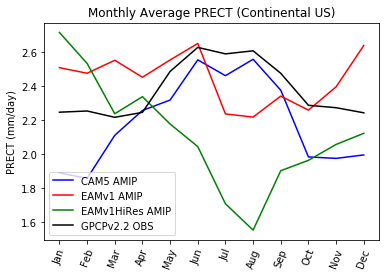

In [30]:
#timeseries plots - amur (1)
varAvgs = list()
for i in range(len(fnames)):
    varAvgs.append(lps.varAverager(varSerList[i],latrange=latrange,lonrange=lonrange))

#plot
#plot amur
monthnames = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
##add nice little labels
plt.xticks(np.arange(13),monthnames,rotation=70)
#plt.xlabel('Month')
plt.ylabel(varname+' (mm/day)')
plt.title("Monthly Average "+ varname + " (Continental US)")

clist = ['blue','red','green','black'] #color list
for i in range(len(fnames)):
    plt.plot(timeseries,varAvgs[i],color=clist[i])
#plt.plot(timeseries,varAvgTestA, color='red')
#plt.plot(timeseries,varAvgRefA, 'b-')
#plt.plot(timeseries,varAvgObsA, color='black')

#legend
plt.legend(fnames,loc='lower left')
plt.savefig('prect_CONUS_ts_TF.pdf',format='pdf',dpi=1000)

plt.show()
plt.close()
#del(varAvgs)

In [29]:
varAvgs[2]

[variable_10556
 masked_array(data = 2.71767644541,
              mask = False,
        fill_value = 1e+20)
 , variable_10582
 masked_array(data = 2.53548464304,
              mask = False,
        fill_value = 1e+20)
 , variable_10608
 masked_array(data = 2.2389493405,
              mask = False,
        fill_value = 1e+20)
 , variable_10634
 masked_array(data = 2.33944376254,
              mask = False,
        fill_value = 1e+20)
 , variable_10660
 masked_array(data = 2.17879030573,
              mask = False,
        fill_value = 1e+20)
 , variable_10686
 masked_array(data = 2.0456929402,
              mask = False,
        fill_value = 1e+20)
 , variable_10712
 masked_array(data = 1.70902107579,
              mask = False,
        fill_value = 1e+20)
 , variable_10738
 masked_array(data = 1.55397366688,
              mask = False,
        fill_value = 1e+20)
 , variable_10764
 masked_array(data = 1.90372122826,
              mask = False,
        fill_value = 1e+20)
 , variable_10